In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]


0          donated
1          donated
2          donated
3          donated
4      not donated
          ...     
743    not donated
744    not donated
745    not donated
746    not donated
747    not donated
Name: Class, Length: 748, dtype: object

In [6]:
#Question 1: 
print(target.value_counts())
print(target.unique())

not donated    570
donated        178
Name: Class, dtype: int64
['donated' 'not donated']


In [8]:
#Question 2
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

model = DummyClassifier(strategy="most_frequent")
cv_results = cross_validate(model, data, target, cv=10)

print(cv_results["test_score"].mean())

0.762054054054054


In [9]:
#Question 3
model = DummyClassifier(strategy="most_frequent")
cv_results = cross_validate(model, data, target, cv=10, scoring="balanced_accuracy")

print(cv_results["test_score"].mean())

0.5


# Question 4 

Why is it relevant to add a preprocessing step to scale the data using a StandardScaler when working with a KNeighborsClassifier?


Adding a preprocessing step to scale data using a StandardScaler when working with a KNeighborsClassifier is highly relevant and beneficial due to several reasons, primarily due to the nature of the algorithm itself:

    Distance Sensitivity: KNeighborsClassifier operates based on distance metrics to make classifications. It calculates the distances between a query example and the examples in the training set to identify the 'k' nearest neighbors. Common distance metrics used include Euclidean, Manhattan, or Minkowski distances. Scaling the features ensures that each feature contributes equally to the distance computations. Without scaling, features with larger scales dominate the distance calculations, potentially leading to suboptimal performance.

    Equal Contribution of Features: In many datasets, different features can have different units and scales – for example, one feature might range from 0 to 1, while another could range from 0 to 1000. Without scaling, the larger range feature will disproportionately influence the result, which can skew the algorithm's behavior. StandardScaler normalizes each feature to mean 0 and variance 1, ensuring that each feature contributes equally, regardless of their original scale or units.

    Improved Algorithm Performance: Scaling can lead to a more meaningful distance metric, which is crucial for the performance of the k-nearest neighbors algorithm. When distances are computed more accurately in terms of underlying patterns rather than scales of measurement, the classifier is more likely to make correct predictions.

    Faster Convergence: In some implementations, scaling can help in speeding up the convergence of the algorithm, especially when it involves iterative distance computation optimizations.

In [13]:
# Question 5 - 6
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


model = make_pipeline(
    StandardScaler(), KNeighborsClassifier(n_neighbors=1) # Q6 : n_neighbors = 1
)

# model.get_params() # Q5

cv_results = cross_validate(model, data, target, cv=10, scoring="balanced_accuracy", return_train_score=True)

print(cv_results["test_score"].mean())
print(cv_results["train_score"].mean())

0.4727468180254559
0.8879979500381389


In [14]:
model.get_params() 

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

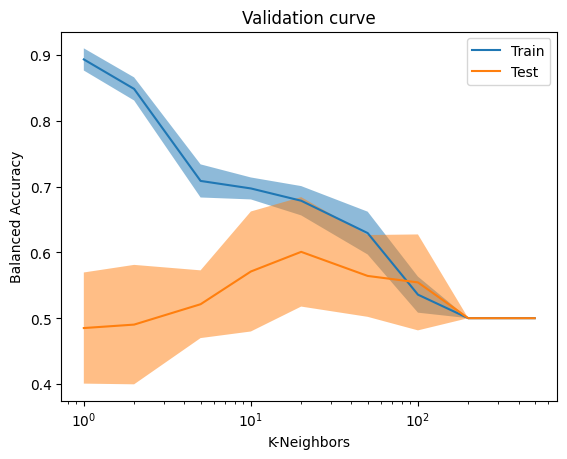

In [16]:
# Question 7
from sklearn.model_selection import ValidationCurveDisplay
import numpy as np

param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="K-Neighbors",
    ylabel="Balanced Accuracy",
    title="Validation curve",
)

# undefitting for high neighbors > 100 because train and test 
# set have the same error and high training error (balanced accuracy 0.5)

#overfitting for low neighbors (high training error)


Wrap-up

    Overfitting is caused by the limited size of the training set, the noise in the data, and the high flexibility of common machine learning models.

    Underfitting happens when the learnt prediction functions suffer from systematic errors. This can be caused by a choice of model family and parameters, which leads to a lack of flexibility to capture the repeatable structure of the true data generating process.

    For a fixed training set, the objective is to minimize the test error by adjusting the model family and its parameters to find the best trade-off between overfitting for underfitting.

    For a given choice of model family and parameters, increasing the training set size will decrease overfitting but can also cause an increase of underfitting.

    The test error of a model that is neither overfitting nor underfitting can still be high if the variations of the target variable cannot be fully determined by the input features. This irreducible error is caused by what we sometimes call label noise. In practice, this often happens when we do not have access to important features for one reason or another.

To go further

It is possible to give a precise mathematical treatment of the bias and the variance of a regression model. The Wikipedia article on the Bias-variance (https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) tradeoff explains how the squared test error can be decomposed as the sum of the squared bias, the variance and the irreducible error for a given regression error.